# Contour length index (CLI)

In [20]:
from IPython.display import HTML

%run ../_setup.py

import numpy as np
import datetime

from netCDF4 import Dataset, num2date

from OceanPy.animations import play2D

import matplotlib.pyplot as plt
%matplotlib notebook

In [21]:
input_file = os.path.join(datadir, 'external', 'ssh', 'SEALEVEL_GLO_PHY_L4_REP_OBS_137_-52.4_147_-48_199801-199812.nc')
sl = Dataset(input_file)
# sl.variables.keys()

lon, lat = sl['longitude'][:], sl['latitude'][:]

sl['adt']

<class 'netCDF4._netCDF4.Variable'>
int32 adt(time, latitude, longitude)
    _FillValue: -2147483647
    comment: The absolute dynamic topography is the sea surface height above geoid; the adt is obtained as follows: adt=sla+mdt where mdt is the mean dynamic topography; see the product user manual for details
    coordinates: time latitude longitude 
    grid_mapping: crs
    long_name: Absolute dynamic topography
    scale_factor: 0.0001
    standard_name: sea_surface_height_above_geoid
    units: m
unlimited dimensions: 
current shape = (365, 19, 41)
filling on

In [22]:

def contour_length(lon, lat, var, contour_range=(-0.1, 0.4)): #contour_center= , 
    
    contour_center = (contour_range[1] - contour_range[0]) / 2
            
    lat_ct = []
    cl = 0
    
    # for each longitudinal grid cell from west to east
    for iln in range(len(lon)):
        
        # find latitudinal indices within contour range
        ilt = np.where((var[:, iln] < contour_range[1]) & (var[:, iln] > contour_range[0]))[0]

        # find latitudinal index of center contour, but not further than one latitudinal step away from previous
#         iltc = (np.abs(var[:,iln] - contour_center)).argmin()
        iltc = np.argsort(np.abs(var[:, iln] - contour_center))
        if iln > 0:
            i = 0
            while np.abs(iltc[i] - iltcprev) >= 3:
                i += 1
            iltc = iltc[i]
        else:
            iltc = iltc[0]
        iltcprev = iltc
        
        # determine mean latitude in contour range
        lats = lat[ilt]
        if len(ilt) > 1:
            try:
                ic = np.where(ilt == iltc)[0][0]
            except IndexError:
                print(ilt, iltc)
            trueidx = np.zeros(len(ilt), dtype=bool)
            trueidx[ic] = True
            
            # find latitudinal indices that are consecutive/ contiguous from center contour
            contiguous = iltc
#             print(ilt)
            for i in range(ic+1, len(ilt)):
                if (ilt[i] == contiguous + 1) & (np.abs(contiguous - iltc) <= 3): #and not ilt[i] > iltc + 3:
                    trueidx[i] = True
                contiguous += 1
            contiguous = iltc
            for i in reversed(range(0, ic)):
                if (ilt[i] == contiguous - 1)  & (np.abs(contiguous - iltc) <= 3): #and not ilt[i] < iltc - 3:
                    trueidx[i] = True
                contiguous -= 1
#             print(trueidx)
            lat_mean = np.mean(lats[trueidx])
          
        elif len(ilt) == 1:
            lat_mean = lat[iltc]
        
        lat_ct.append(lat_mean)
     
#         # find latitude for prescribed contour value
#         ilt = (np.abs(var[:,iln] - contour)).argmin()
#         lat_ct.append(lat[ilts])

        # calculate latitudinal and longitudinal increments and calculate contour length
        if iln > 0:
            dlon = lon[iln] - lon[iln-1]
            dlat = lat_ct[iln] - lat_ct[iln-1]
            
#             print(dlon, dlat)

            cl += np.sqrt(dlon*2 + dlat**2)
        
    return cl, lat_ct


In [23]:

def contour_length(lon, lat, var, contour_range=(-0.1, 0.4)): #contour_center= , 
    
    contour_center = (contour_range[1] - contour_range[0]) / 2
            
    lat_ct = []
    cl = 0
    
    # for each longitudinal grid cell from west to east
    for iln in range(len(lon)):
        
        # find latitudinal indices within contour range
        ilt = np.where((var[:, iln] < contour_range[1]) & (var[:, iln] > contour_range[0]))[0]

        # find latitudinal index of center contour, but not further than one latitudinal step away from previous
#         iltc = (np.abs(var[:,iln] - contour_center)).argmin()
        iltc = np.argsort(np.abs(var[:, iln] - contour_center))
        if iln > 0:
            i = 0
            while np.abs(iltc[i] - iltcprev) >= 3:
                i += 1
            iltc = iltc[i]
        else:
            iltc = iltc[0]
        iltcprev = iltc
        
        # determine mean latitude in contour range
        lats = lat[ilt]
        if len(ilt) > 1:
            try:
                ic = np.where(ilt == iltc)[0][0]
            except IndexError:
                print(ilt, iltc)
            trueidx = np.zeros(len(ilt), dtype=bool)
            trueidx[ic] = True
            
            # find latitudinal indices that are consecutive/ contiguous from center contour
            contiguous = iltc
#             print(ilt)
            for i in range(ic+1, len(ilt)):
                if (ilt[i] == contiguous + 1) & (np.abs(contiguous - iltc) <= 3): #and not ilt[i] > iltc + 3:
                    trueidx[i] = True
                contiguous += 1
            contiguous = iltc
            for i in reversed(range(0, ic)):
                if (ilt[i] == contiguous - 1)  & (np.abs(contiguous - iltc) <= 3): #and not ilt[i] < iltc - 3:
                    trueidx[i] = True
                contiguous -= 1
#             print(trueidx)
            lat_mean = np.mean(lats[trueidx])
          
        elif len(ilt) == 1:
            lat_mean = lat[iltc]
        
        lat_ct.append(lat_mean)
     
#         # find latitude for prescribed contour value
#         ilt = (np.abs(var[:,iln] - contour)).argmin()
#         lat_ct.append(lat[ilts])

        # calculate latitudinal and longitudinal increments and calculate contour length
        if iln > 0:
            dlon = lon[iln] - lon[iln-1]
            dlat = lat_ct[iln] - lat_ct[iln-1]
            
#             print(dlon, dlat)

            cl += np.sqrt(dlon*2 + dlat**2)
        
    return cl, lat_ct


In [24]:
annualmean = np.mean(sl['adt'], axis=0)
annualmeancl, lat_ct = contour_length(lon[4:32], lat, annualmean[:, 4:32], contour_range=(0, 0.3))

# annualmean = np.mean(sl['adt'][60:80], axis=0)
print(annualmean.shape, lon[4:32].shape, lat.shape)

(19, 41) (28,) (19,)


<IPython.core.display.Javascript object>


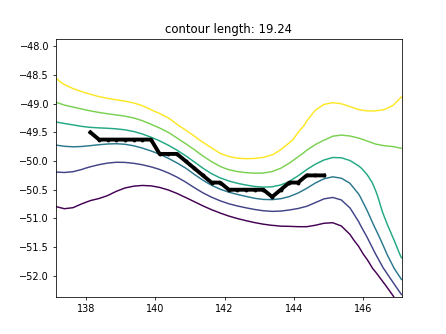

In [26]:
plt.contour(sl['longitude'][:], sl['latitude'][:], annualmean, [-0.1, 0, 0.1, 0.2, 0.3, 0.4])
plt.plot(lon[4:32], lat_ct, 'k.-', linewidth=4, )
plt.title('contour length: %s' %round(annualmeancl, 2))

In [27]:
time = num2date(sl['time'][:], sl['time'].units)
# determine time of the voyage
time = sl['time']
time = num2date(time[:], time.units)
# begin = datetime.datetime(1998, 3, 10)
# end = datetime.datetime(1998, 3, 28)

# timevoy = np.array([begin <= t <= end for t in time])

<IPython.core.display.Javascript object>


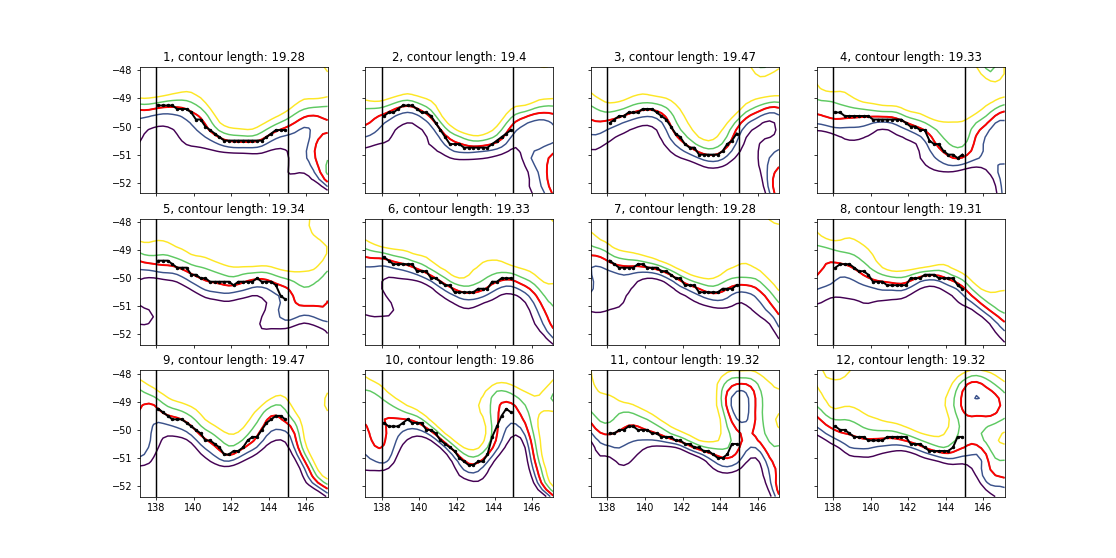

In [28]:
fig, ax = plt.subplots(3, 4, figsize=(16, 8), sharex=True, sharey=True)
rows, cols = ax.shape
month = 1

cli = []
for row in range(rows):
    for col in range(cols):
        idx = [t.month == month for t in time]

        monthlymean = np.mean(sl['adt'][idx,], axis=0)
        cl, lat_ct = contour_length(lon[4:32], lat, monthlymean[:, 4:32], contour_range=(0, 0.3))
        cli.append(cl - annualmeancl)
        ct = ax[row, col].contour(sl['longitude'][:], sl['latitude'][:], monthlymean, np.linspace(-0.1, 0.4, 5)) #[-0.1, 0, 0.1, 0.2, 0.3, 0.4]
        ax[row, col].contour(sl['longitude'][:], sl['latitude'][:], monthlymean, [0.15], colors='r', linewidths=2)
        ax[row, col].plot(lon[4:32], lat_ct, 'k.-', linewidth=2, markersize=5)
        ax[row, col].set_title('%s, contour length: %s' %(month, round(cl, 2)))
        ax[row, col].axvline(138, color='k')
        ax[row, col].axvline(145, color='k')

        month += 1

In [29]:
month=11
idx = [t.month == month for t in time]
monthlymean = np.mean(sl['adt'][idx,], axis=0)
cl, lat_ct = contour_length(lon[4:32], lat, monthlymean[:, 4:32], contour_range=(0.0,0.3))

# fig, ax = plt.subplots()
# ct = ax.contour(sl['longitude'][:], sl['latitude'][:], monthlymean, [0, 0.15, 0.3])
# ax.plot(lon[4:32], lat_ct, 'k.-', linewidth=2, markersize=4)


In [30]:
sl.variables.keys()

odict_keys(['err', 'time', 'latitude', 'longitude', 'vgosa', 'vgos', 'sla', 'ugosa', 'adt', 'ugos'])

In [31]:
sl['sla']

<class 'netCDF4._netCDF4.Variable'>
int32 sla(time, latitude, longitude)
    _FillValue: -2147483647
    comment: The sea level anomaly is the sea surface height above mean sea surface; it is referenced to the [1993, 2012] period; see the product user manual for details
    coordinates: time latitude longitude 
    grid_mapping: crs
    long_name: Sea level anomaly
    scale_factor: 0.0001
    standard_name: sea_surface_height_above_sea_level
    units: m
unlimited dimensions: 
current shape = (365, 19, 41)
filling on

In [32]:
## DETERMINE HOVMOLLER
# for each timestep average latitudinal values from -48.6 - -51.8
hm = np.ma.masked_all(sl['sla'][:,2:-3,4:-9].shape[0::2])
for it in range(len(time)):
    hm[it, :] = np.average(sl['sla'][it,2:-3,4:-9], axis=0)

In [33]:
import pandas as pd
pd.date_range(start='1/1/1998', periods=12, freq='M')

df = pd.read_csv(os.path.join(datadir, 'external', 'sam', 'monthly_sam_1957-2007.txt'), sep='\s+')
df.columns = range(1, 13)
df = df.stack()
year = df.index.get_level_values(0).values
month = df.index.get_level_values(1).values

df.index = pd.PeriodIndex(year=year, month=month, freq='M')

df98 = pd.DataFrame(df.loc[df.index.year == 1998], columns=['SAM'])
df98['SAMpos'] = df98['SAM'] > 0
df98['CLI'] = cli
df98['CLIpos'] = df98['CLI'] > 0


<IPython.core.display.Javascript object>


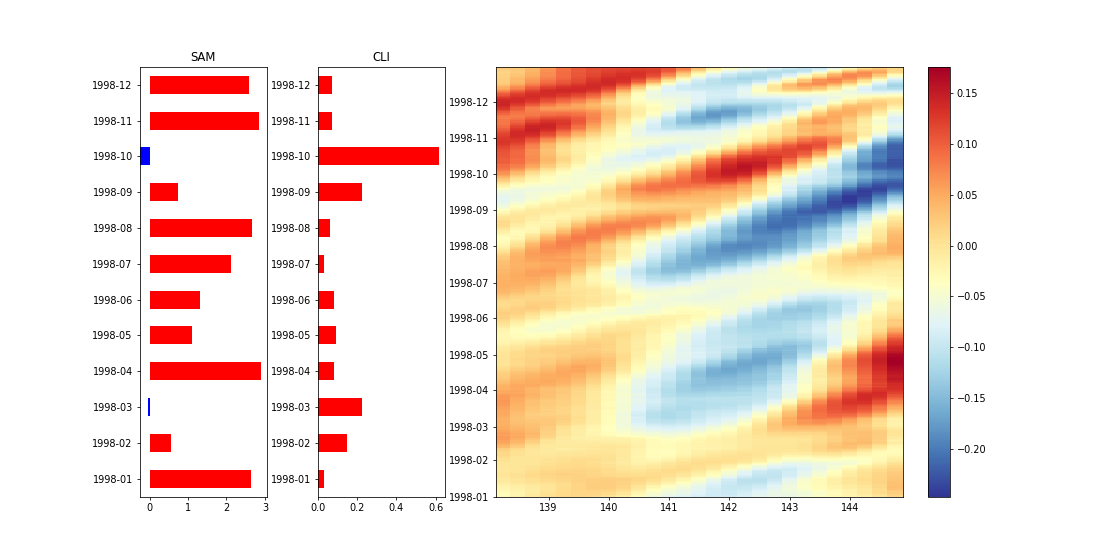

In [35]:
fig, ax = plt.subplots(1,3, gridspec_kw = {'width_ratios':[1, 1, 4]}, figsize = (16,8))
df98['SAM'].plot(kind='barh', ax=ax[0], color=df98.SAMpos.map({True: 'r', False: 'b'}))
df98['CLI'].plot(kind='barh', ax=ax[1], color=df98.CLIpos.map({True: 'r', False: 'b'}))
pcol = ax[2].pcolormesh(sl['longitude'][4:-9], time, hm, cmap=plt.cm.RdYlBu_r)
ax[0].set_title('SAM')
ax[1].set_title('CLI')
plt.colorbar(pcol, ax=ax[2])


* Check with movie what red/ blue patches mean, red patches seem to indicate Rossby wave travelling eastward and blue patches should show in movie as Rossby waves travelling westward
* Discuss with supervisors if necessary to do this analysis for all years of valid altimetry and discuss improvement of script for calculating the contour length (see notes) and SAM index or average wind area location upstream of meander

<IPython.core.display.Javascript object>


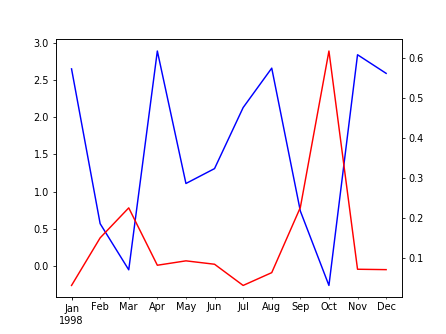

In [36]:
fig, ax = plt.subplots()
ax1 = df98['SAM'].plot(color='b')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df98['CLI'].plot(color='r', ax=ax2)

In [37]:
input_file = os.path.join(datadir, 'external', 'ssh', 'SEALEVEL_GLO_PHY_L4_REP_OBS_137_-52.4_147_-48_199301-201801.nc')
sl = Dataset(input_file)

<IPython.core.display.Javascript object>


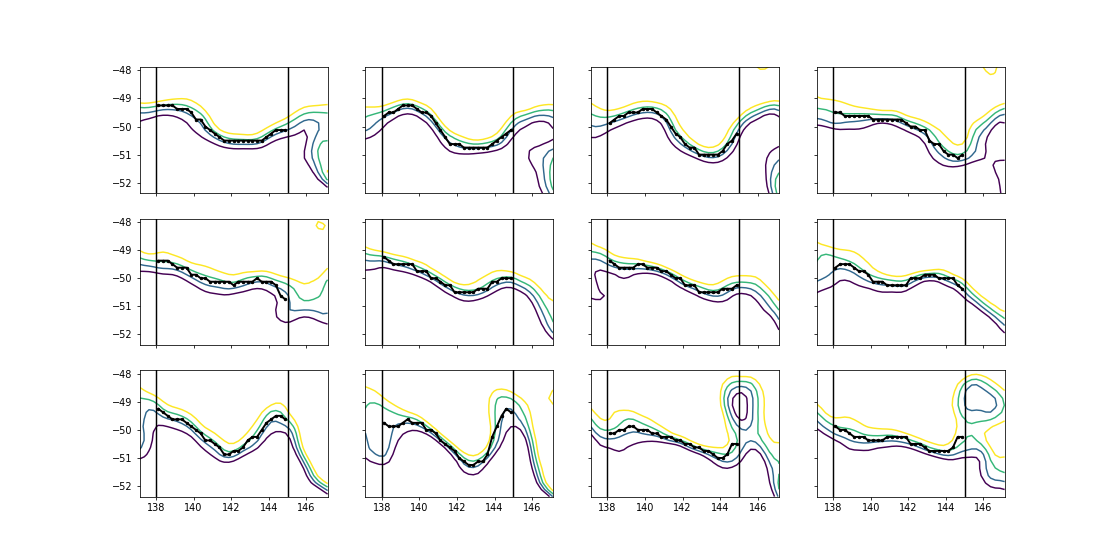

<IPython.core.display.Javascript object>


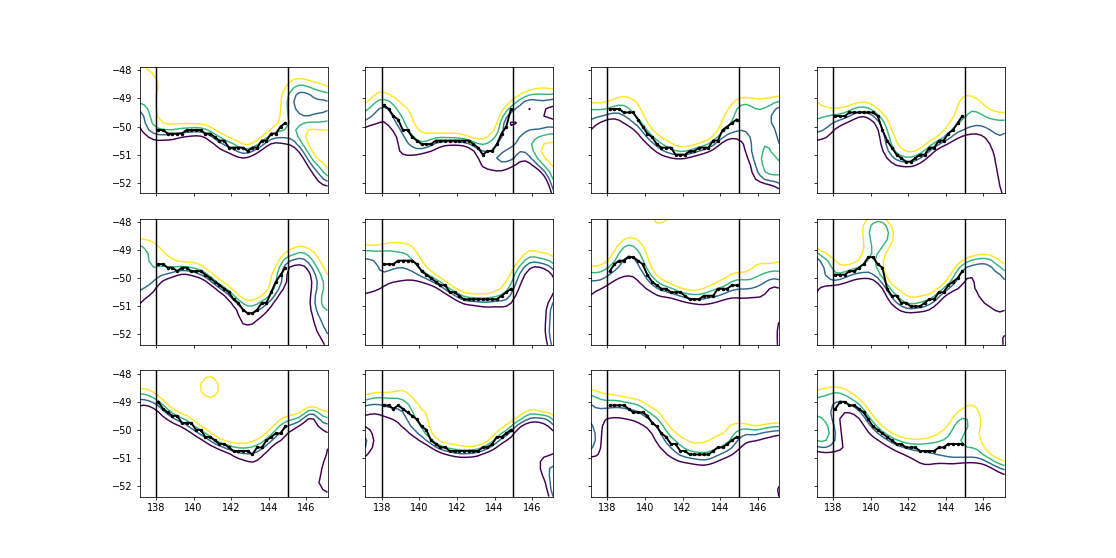

<IPython.core.display.Javascript object>


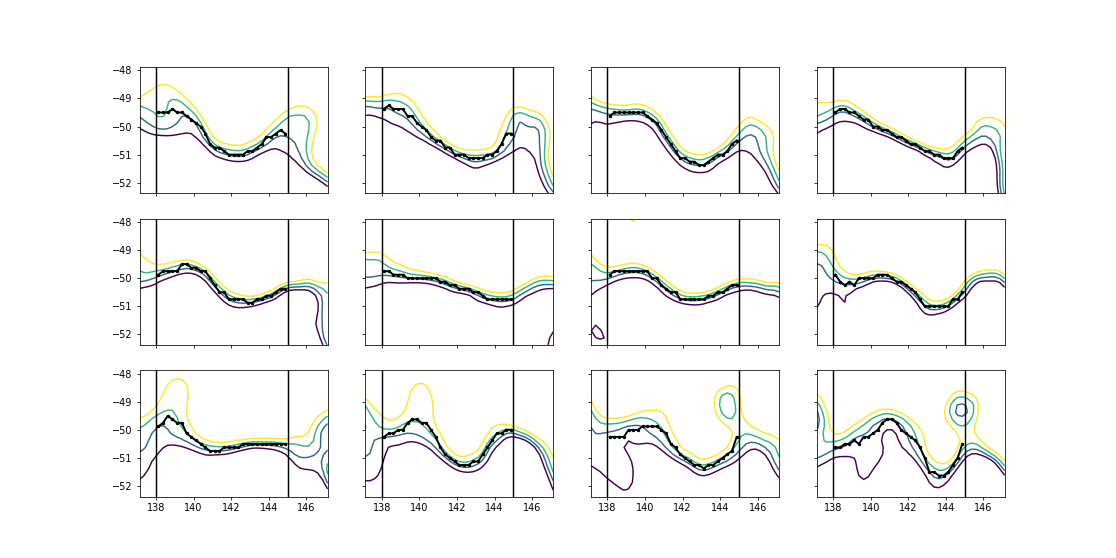

In [39]:
%matplotlib qt
lon, lat = sl['longitude'][:], sl['latitude'][:]

time = num2date(sl['time'][:], sl['time'].units)
# idx = [t.month == month for t in time]

nyr = 2000


sel = slice(4, 32)


cli = []
for nyr in range(1998, 2001):
    
    fig, ax = plt.subplots(3, 4, figsize=(16, 8), sharex=True, sharey=True)
    rows, cols = ax.shape
    row, col = 0, 0
    
    year = [t.year == nyr for t in time]    
    annualmean = np.mean(sl['adt'][year,], axis=0)
    amcl, lat_ct = contour_length(lon[sel], lat, annualmean[:, sel], contour_range=(0, 0.3))
    
#     plt.contour(lon, lat, annualmean, [-0.1, 0, 0.1, 0.2, 0.3, 0.4]) # 
#     plt.plot(lon[sel], lat_ct, 'k.-', linewidth=4, )
#     plt.title('contour length: %s' %round(annualmeancl, 2))
    
    for nmth in range(1, 13):
        month = [(t.year == nyr) & (t.month == nmth) for t in time]
        monthlymean = np.mean(sl['adt'][month,], axis=0)

        mmcl, lat_ct = contour_length(lon[sel], lat, monthlymean[:, sel], contour_range=(0, 0.3))
        cli.append(mmcl - amcl)
        

        ct = ax[row, col].contour(sl['longitude'][:], sl['latitude'][:], monthlymean, np.linspace(0, 0.3, 4)) #[-0.1, 0, 0.1, 0.2, 0.3, 0.4]
#         ax[row, col].contour(sl['longitude'][:], sl['latitude'][:], monthlymean, [0.15], colors='r', linewidths=2)
        ax[row, col].plot(lon[sel], lat_ct, 'k.-', linewidth=2, markersize=5)
#         ax[row, col].set_title('%s, contour length: %s' %(month, round(cl, 2)))
        ax[row, col].axvline(138, color='k')
        ax[row, col].axvline(145, color='k')
        
        col += 1
        if col % cols == 0:
            col = 0
            row += 1
        
        plt.show()

        
#   for row in range(rows):
#     for col in range(cols):
#         idx = [t.month == month for t in time]

#         monthlymean = np.mean(sl['adt'][idx,], axis=0)
#         cl, lat_ct = contour_length(lon[4:32], lat, monthlymean[:, 4:32], contour_range=(0, 0.3))
#         cli.append(cl - annualmeancl)
#         ct = ax[row, col].contour(sl['longitude'][:], sl['latitude'][:], monthlymean, np.linspace(-0.1, 0.4, 5)) #[-0.1, 0, 0.1, 0.2, 0.3, 0.4]
#         ax[row, col].contour(sl['longitude'][:], sl['latitude'][:], monthlymean, [0.15], colors='r', linewidths=2)
#         ax[row, col].plot(lon[4:32], lat_ct, 'k.-', linewidth=2, markersize=5)
#         ax[row, col].set_title('%s, contour length: %s' %(month, round(cl, 2)))
#         ax[row, col].axvline(138, color='k')
#         ax[row, col].axvline(145, color='k')






<IPython.core.display.Javascript object>


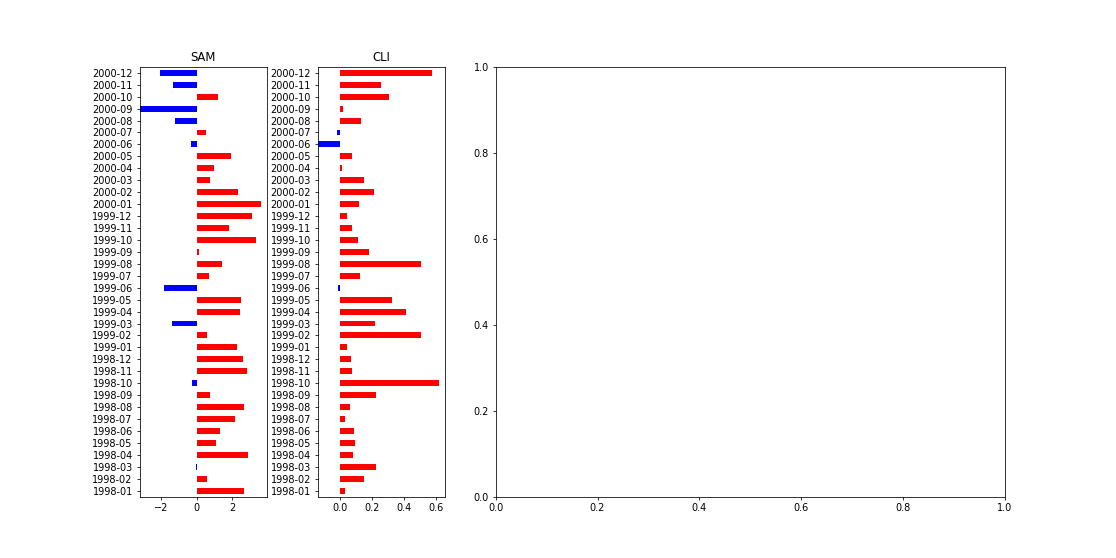

In [40]:
df_new = pd.DataFrame(df.loc[(df.index.year >= 1998) & (df.index.year < 2001) ], columns=['SAM'])
df_new['SAMpos'] = df_new['SAM'] > 0
df_new['CLI'] = cli
df_new['CLIpos'] = df_new['CLI'] > 0

fig, ax = plt.subplots(1,3, gridspec_kw = {'width_ratios':[1, 1, 4]}, figsize = (16,8))
df_new['SAM'].plot(kind='barh', ax=ax[0], color=df_new.SAMpos.map({True: 'r', False: 'b'}))
df_new['CLI'].plot(kind='barh', ax=ax[1], color=df_new.CLIpos.map({True: 'r', False: 'b'}))
# pcol = ax[2].pcolormesh(sl['longitude'][4:-9], time, hm, cmap=plt.cm.RdYlBu_r)
ax[0].set_title('SAM')
ax[1].set_title('CLI')
# plt.colorbar(pcol, ax=ax[2])


<IPython.core.display.Javascript object>


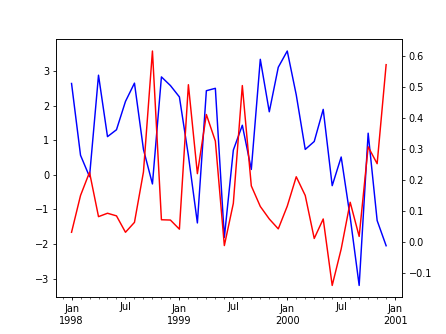

In [41]:
fig, ax = plt.subplots()
ax1 = df_new['SAM'].plot(color='b')
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_new['CLI'].plot(color='r', ax=ax2)

In [62]:
import xarray
sl = xarray.open_dataset(input_file).load()


In [78]:
np.squeeze(np.where(annualmean[:, 0] < 0.3))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [19]:
import numpy as np

def arc_length(x, y):
    npts = len(x)
    arc = np.sqrt((x[1] - x[0])**2 + (y[1] - y[0])**2)
    for k in range(1, npts):
        arc = arc + np.sqrt((x[k] - x[k-1])**2 + (y[k] - y[k-1])**2)

    return arc


# Parabolic segment
npts = 1000
a = 3.
h = 5.
x = np.linspace(-a, a, npts)
y = h*(1 - x**2/a**2)
analytic = np.sqrt(a**2 + 4*h**2) + a**2/(2*h)*np.arcsinh(2*h/a)
numeric = arc_length(x, y)
print(analytic, numeric)

# Semicircle
npts = 1000
x = np.linspace(-1, 1, npts)
y = np.sqrt(1 - x**2)
analytic = np.pi
numeric = arc_length(x, y)
print(analytic, numeric)


12.1673133338 12.1881924551
3.141592653589793 3.20484351644
